In [1]:
import pandas as pd
reason_type = {
    '-1': 'none',
    '0': 'none',
    '1': 'simplification',
    '2': 'integration',
    '3': 'feature',
    '4': 'usability',
    '5': 'performance',
    '6': 'deprecation',
    '7': 'bug or issue',
    '8': 'organization',
    '9': 'license',
    '10': 'security',
    '11': 'popularity',
    '13': 'new',
    '14': 'bug or issue',
    '15': 'integration',
    '16': 'size',
}
def get_reason_type(id):
    return reason_type[str(id)]

def get_reason_dist(language):
    reason_df = pd.read_csv(f'reason/{language}_reason.csv')
    reason_df = reason_df.sort_values(by='reason_type', ascending=False)
    reason_df = reason_df.drop_duplicates(subset=['repo_name', 'reason_type'])
    reason_df = reason_df['reason_type'].value_counts().reset_index()

    reason_df['index'] = reason_df['index'].apply(get_reason_type)
    reason_df['prop'] = (reason_df['reason_type'] / sum(reason_df['reason_type']) * 1000).astype('int') / 10
    return reason_df

In [2]:
get_reason_dist('python')

,index,reason_type,prop
0,integration,146,27.1
1,feature,88,16.3
2,deprecation,65,12.0
3,performance,61,11.3
4,usability,58,10.7
5,simplification,48,8.9
6,bug or issue,37,6.8
7,security,14,2.6
8,new,8,1.4
9,popularity,6,1.1


In [3]:
get_reason_dist('java')

,index,reason_type,prop
0,integration,54,30.3
1,deprecation,35,19.6
2,simplification,32,17.9
3,usability,18,10.1
4,feature,13,7.3
5,bug or issue,6,3.3
6,performance,6,3.3
7,security,5,2.8
8,new,3,1.6
9,popularity,2,1.1


In [4]:
get_reason_dist('js')

,index,reason_type,prop
0,deprecation,51,47.6
1,integration,17,15.8
2,feature,10,9.3
3,bug or issue,7,6.5
4,performance,6,5.6
5,usability,4,3.7
6,size,3,2.8
7,new,3,2.8
8,security,3,2.8
9,simplification,3,2.8


In [5]:
import numpy as np
from matplotlib import pyplot as plt
reasons = ['Source Library', 'Target Library', 'Project Specific']
languages = ['java', 'js', 'python']
y_label = {
    'python': 'Python',
    'java': 'Java',
    'js': 'JavaScript'
}
markers = {
    'Source Library': 's',
    'Target Library': '^',
    'Project Specific': 'o'
}

def draw_reason_dist_evo():
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12, 2.5))
    for i in range(0, 3):
        language = languages[i]
        x = [i for i in np.arange(2005, 2021)]
        reason_evo = pd.read_csv(f'temp/reason_{language}_evo.csv')
        for reason in reasons:
            now_reason = np.array(
                reason_evo[reason_evo['reason'] == reason.lower()]['num'].values)
            axes[i].plot(x, now_reason, label=reason,linewidth=1,marker=markers[reason], markersize=4)
        axes[i].legend(title='', loc='upper left', fontsize=8)
        axes[i].set_xticks(np.arange(2005, 2021, 5))
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(f'#Migrations in {y_label[language]}')
    fig.tight_layout()
    fig.savefig(f"pic/reason_evo.pdf", bbox_inches="tight")
    plt.show()

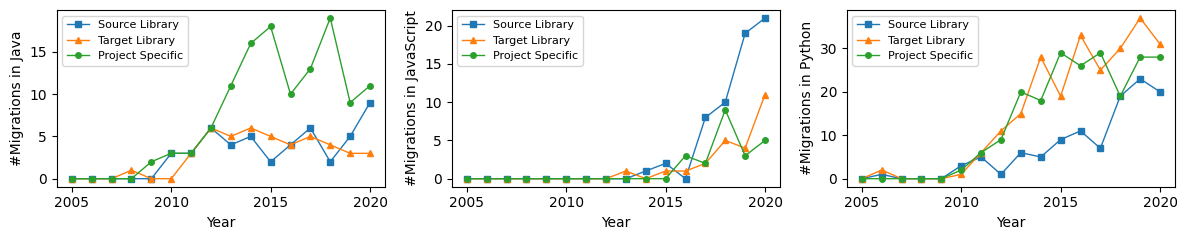

In [6]:
from datautil import cal_reason_evo

for language in ['java', 'python', 'js']:
    cal_reason_evo(language)

draw_reason_dist_evo()